# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment.

In [2]:
# You might want to use the following package
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Your code goes here for this section.
housing = pd.read_csv('housing.csv')
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


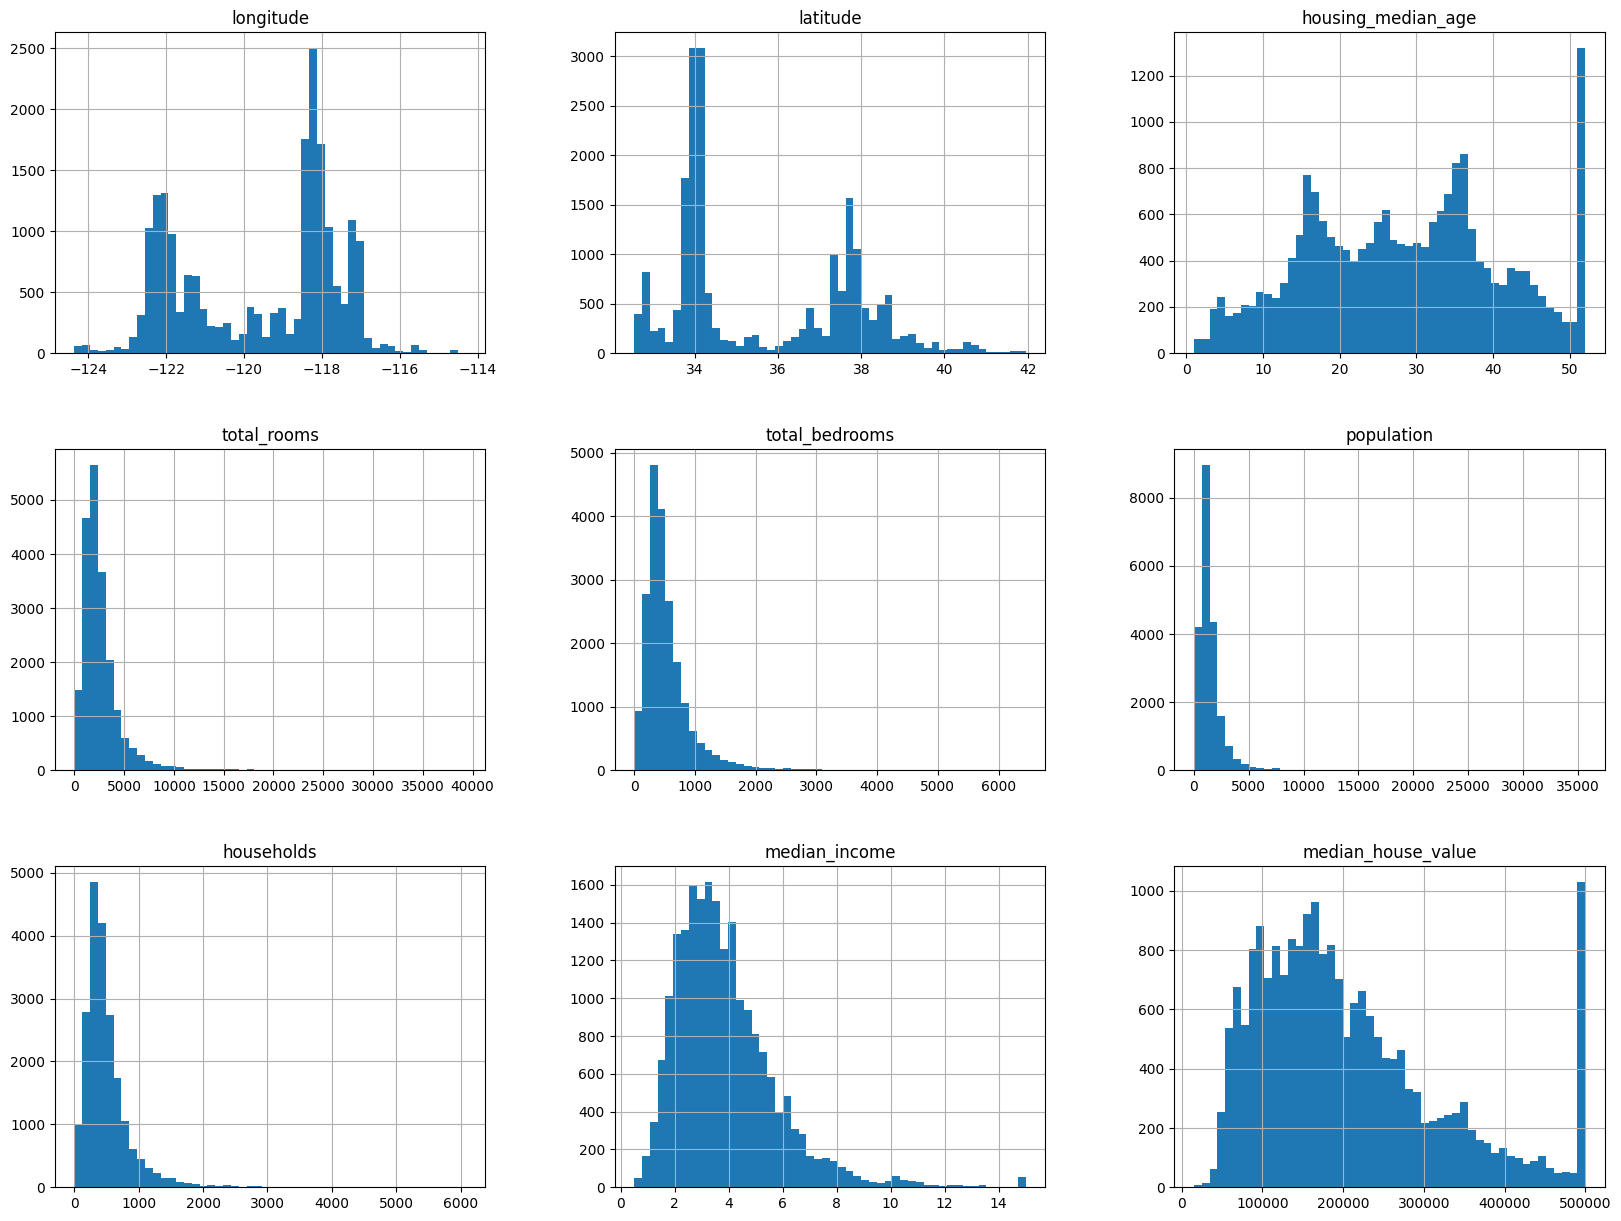

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [5]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])



In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

<ipython-input-7-3dbf8a34c0d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis = 1, inplace=True)
<ipython-input-7-3dbf8a34c0d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis = 1, inplace=True)


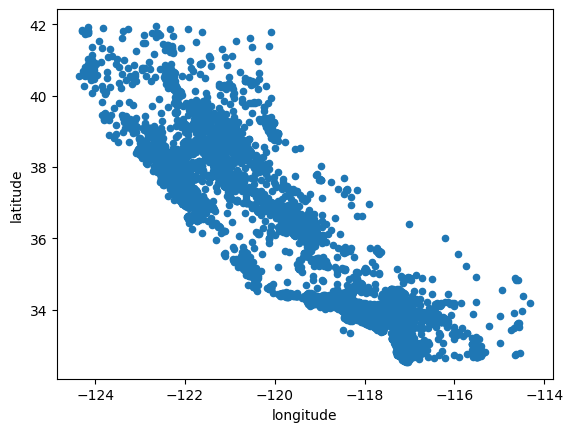

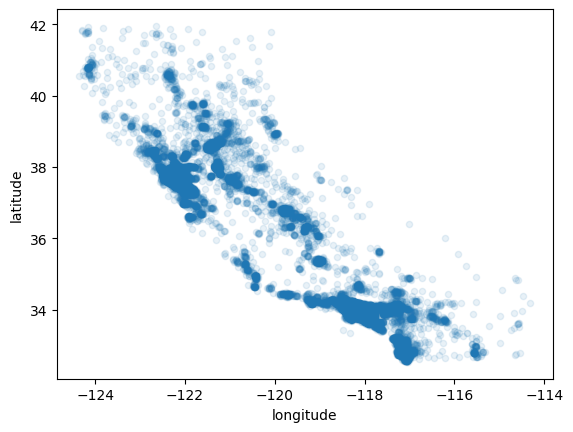

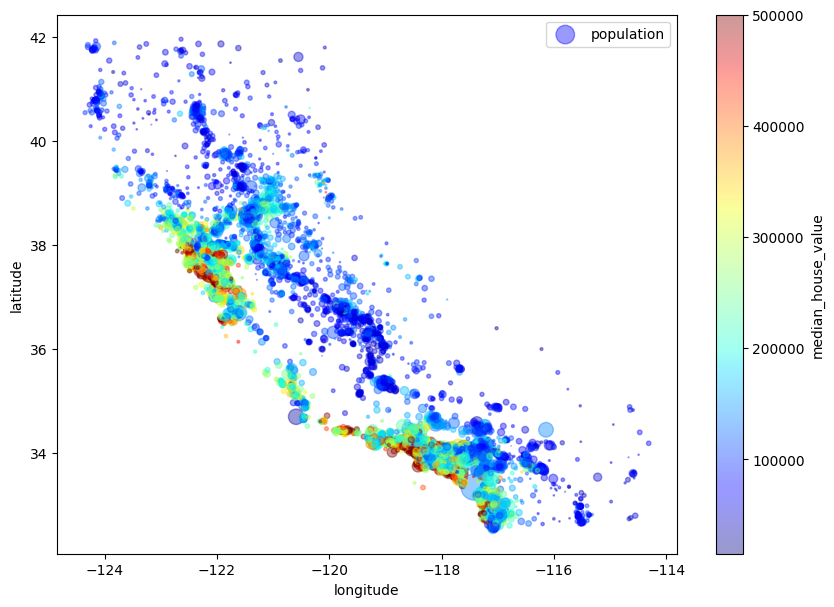

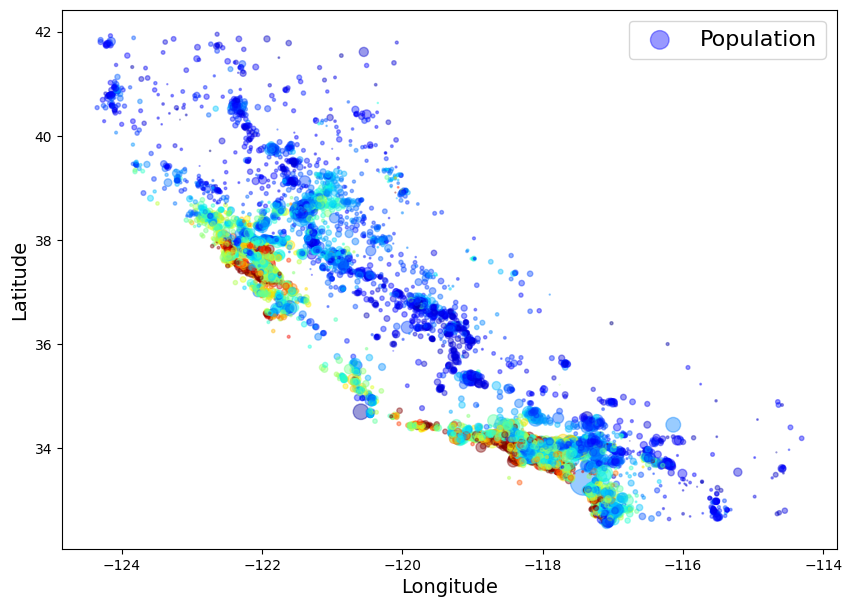

In [7]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)

housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

import matplotlib.image as mpimg
# Read the image of California (make sure you have it in the directory)
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar()
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

In [8]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

<ipython-input-9-8f2102db9f85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


(0.0, 16.0, 0.0, 550000.0)

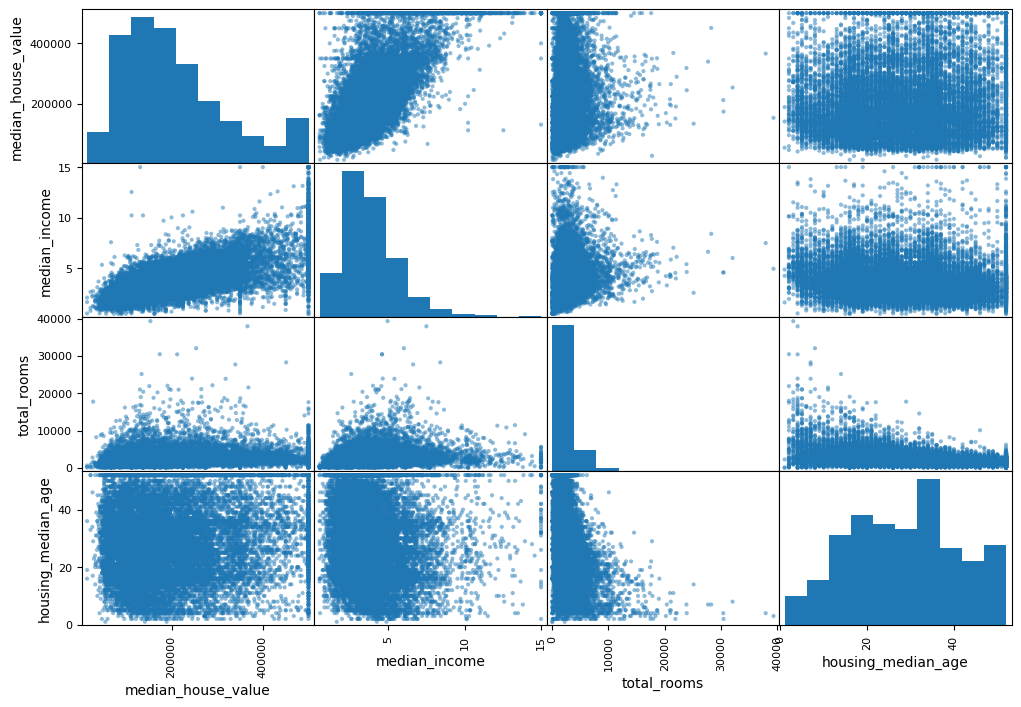

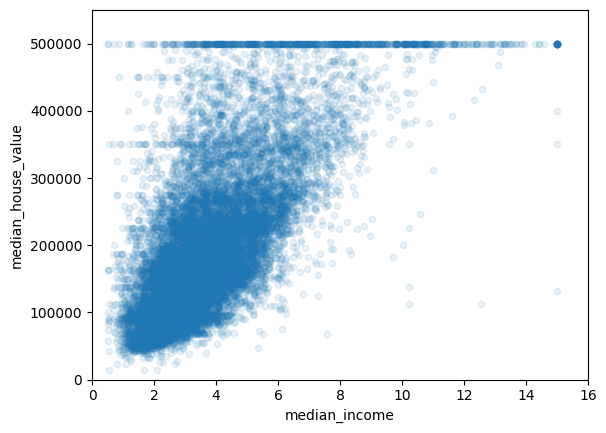

In [9]:
corr_matrix = housing.corr()
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [10]:
housing = strat_train_set.drop("median_house_value", axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
housing_numerics = housing.select_dtypes(include=numerics)

imputer.fit(housing_numerics)
X = imputer.transform(housing_numerics)
train_tr = pd.DataFrame(X, columns=housing_numerics.columns,
                          index=housing.index)

housing_cat = train_set.select_dtypes(exclude = numerics)
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_numerics_tr = num_pipeline.fit_transform(housing_numerics)

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_numerics)
cat_attribs = list(housing_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

cat_col_names = list(cat_encoder.categories_[0])

train_set_prepared = full_pipeline.fit_transform(train_set)
housing_tr = pd.DataFrame(train_set_prepared, columns=num_attribs+cat_col_names, index=housing.index)
housing_tr

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,0.0,0.0,0.0,0.0,1.0
15502,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,0.0,0.0,0.0,0.0,1.0
2908,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.0,0.0,0.0,0.0,1.0
14053,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,0.0,0.0,0.0,0.0,1.0
20496,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,1.0,0.0,0.0,0.0,0.0
12661,1.073144,-0.759688,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,0.0,1.0,0.0,0.0,0.0
19263,0.599469,-0.755007,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,1.0,0.0,0.0,0.0,0.0
19140,-1.185540,0.906510,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,1.0,0.0,0.0,0.0,0.0


- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [16]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
from math import *
from decimal import Decimal

def p_root(value, root):

    root_value = 1 / float(root)
    return round (Decimal(value) **
             Decimal(root_value), 3)

def minkowski_distance(x, y, p_value):

    # pass the p_root function to calculate
    # all the value of vector parallelly
    return (p_root(sum(pow(abs(a-b), p_value)
            for a, b in zip(x, y)), p_value))

def initial_centroids(k, data):
    centroids = data.sample(k)
    return centroids

def cluster(reference, data):
    k = reference.shape[0]
    n = data.shape[0]
    clusters = []
    cluster_distance = []

    for point in range(n):
      distance_list = np.array([])
      for centroid in range(k):
        distance = minkowski_distance(reference.iloc[centroid,:], data.iloc[point,:], 2)
        distance_list = np.append(distance_list, distance)

      nearest_centroid = np.where(distance_list == np.min(distance_list))[0].tolist()[0]
      nearest_centroid_distance = np.min(distance_list)
      clusters.append(nearest_centroid)
      cluster_distance.append(nearest_centroid_distance)

    return clusters, cluster_distance

def k_means(k, data):
    centroids = initial_centroids(k, data)
    different = True
    i = 0
    distances_to_centroids = []

    while(different == True):
      data['cluster_list'], distance = cluster(centroids, data)
      centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
      distances_to_centroids.append(sum(distance))
      if i > 0:
        if distances_to_centroids[i] - distances_to_centroids[i-1] < 0.001:
          different = False
      i = i + 1

    return data['cluster_list'], distance, centroids


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


In [20]:
# Your code goes here
housing_tr['cluster_list'], housing_tr['distance'], centroids = k_means(2, housing_tr)
# Your paragraph goes here for this section

<ipython-input-16-e8a6909dd239>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-16-e8a6909dd239>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)


In [21]:
stats2 = pd.DataFrame()
mask = housing_tr['cluster_list'] == 0
stats2['cluster1_mean'] = housing_tr.loc[mask, :].mean()
stats2['cluster2_mean'] = housing_tr.loc[~mask, :].mean()
stats2['cluster1_std'] = housing_tr.loc[mask, :].std()
stats2['cluster2_std'] = housing_tr.loc[~mask, :].std()
sse = np.sum((housing_tr['distance'])**2)
print(stats2)
print(sse)

                    cluster1_mean  cluster2_mean  cluster1_std  cluster2_std
longitude                0.730379      -1.074742      0.474438      0.447538
latitude                -0.748457       1.101344      0.397951      0.448601
housing_median_age      -0.021761       0.032022      0.958890      1.056921
total_rooms              0.091964      -0.135324      1.167716      0.659193
total_bedrooms           0.121346      -0.178559      1.160784      0.659919
population               0.151428      -0.222824      1.165184      0.624968
households               0.122657      -0.180488      1.152533      0.680014
median_income            0.019200      -0.028252      1.008239      0.987223
<1H OCEAN                0.625470       0.178416      0.484026      0.382892
INLAND                   0.220425       0.458015      0.414554      0.498271
ISLAND                   0.000407       0.000000      0.020168      0.000000
NEAR BAY                 0.003967       0.271666      0.062863      0.444852

<ipython-input-21-a0bbec6ec913>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats2['cluster1_std'] = housing_tr.loc[mask, :].std()
<ipython-input-21-a0bbec6ec913>:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats2['cluster2_std'] = housing_tr.loc[~mask, :].std()


<function matplotlib.pyplot.show(close=None, block=None)>

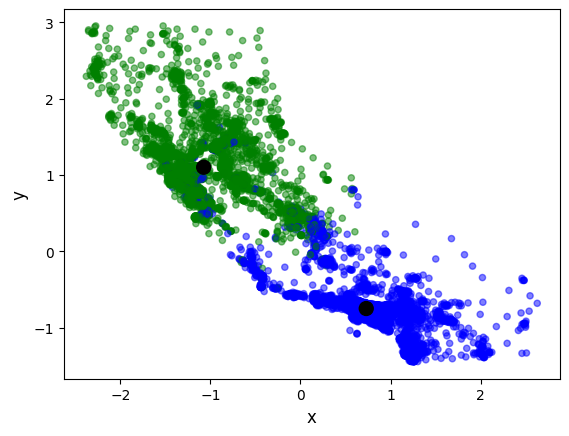

In [22]:
points_color = ListedColormap(['blue', 'green'])
centroids_color = ListedColormap(['black','black'])
plt.scatter(housing_tr.iloc[:,0], housing_tr.iloc[:, 1], marker = 'o',
            c = housing_tr['cluster_list'].astype('category'), cmap = points_color, s = 20, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = ('o'), s = 100, c = [0,1], cmap = centroids_color)
plt.xlabel(r'x', fontsize = 12)
plt.ylabel(r'y', fontsize = 12)
plt.show


Cluster2 in general has more favorable attributes, with lower mean house age, higher mean total rooms, higher mean total bedrooms, etc. comparing to cluster1. Cluster1 has higher standard deviation in some major attributes, indicating a greater wealth difference. Cluster1 would be the area centered at Los Angeles, and cluster2 would be the area centered at San Francisco. The difference in housing latitudes and longitudes might be important factors in clustering.

<ipython-input-40-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-40-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)


                    clusters1_mean  clusters2_mean  clusters3_mean  \
longitude                -1.059939        0.776390        0.203428   
latitude                  1.088910       -0.801437       -0.194012   
housing_median_age        0.111675        0.136347       -0.875274   
total_rooms              -0.243570       -0.279688        1.839773   
total_bedrooms           -0.282855       -0.270893        1.925519   
population               -0.313317       -0.206198        1.765478   
households               -0.287970       -0.264734        1.917056   
median_income            -0.063004        0.012336        0.144438   
<1H OCEAN                 0.174901        0.644954        0.485273   
INLAND                    0.461405        0.199482        0.331724   
ISLAND                    0.000000        0.000493        0.000000   
NEAR BAY                  0.268824        0.000000        0.072912   
NEAR OCEAN                0.094870        0.155070        0.110092   
cluster_list        

<ipython-input-40-4dfa128a7e40>:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-49-c28f94e4c22f>:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats3['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
<ipython-input-49-c28f94e4c22f>:7: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or s

<function matplotlib.pyplot.show(close=None, block=None)>

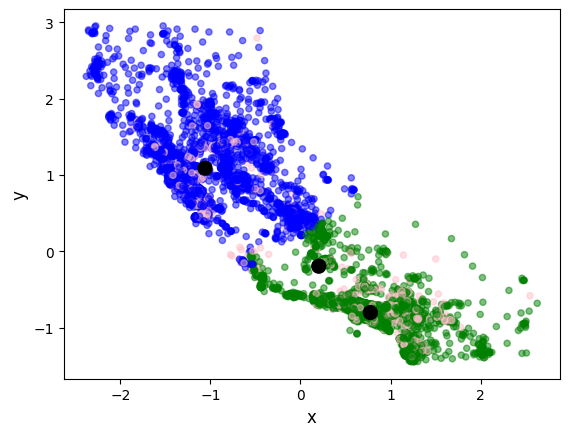

In [49]:
housing_tr['cluster_list'], housing_tr['distance'], centroids = k_means(3, housing_tr)
stats3 = pd.DataFrame()
stats3['clusters1_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].mean()
stats3['clusters2_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].mean()
stats3['clusters3_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].mean()
stats3['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
stats3['clusters2_std'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].std()
stats3['clusters3_std'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].std()
sse = np.sum((housing_tr['distance'])**2)
print(stats3)
print(sse)

points_color = ListedColormap(['blue', 'green', 'pink'])
centroids_color = ListedColormap(['black','black','black'])
plt.scatter(housing_tr.iloc[:,0], housing_tr.iloc[:, 1], marker = 'o',
            c = housing_tr['cluster_list'].astype('category'), cmap = points_color, s = 20, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = ('o'), s = 100, c = [0,1,2], cmap = centroids_color)
plt.xlabel(r'x', fontsize = 12)
plt.ylabel(r'y', fontsize = 12)
plt.show

<ipython-input-40-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-40-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)


                    clusters1_mean  clusters2_mean  clusters3_mean  \
longitude                -1.142392        0.802937       -0.857545   
latitude                  1.025845       -0.828250        1.077539   
housing_median_age        0.879484        0.119898       -0.785361   
total_rooms              -0.437751       -0.238711       -0.057728   
total_bedrooms           -0.460778       -0.204557       -0.086512   
population               -0.490634       -0.145961       -0.119786   
households               -0.456486       -0.200172       -0.108736   
median_income            -0.103113       -0.010832       -0.169762   
<1H OCEAN                 0.146091        0.656941        0.192616   
INLAND                    0.323045        0.185509        0.667737   
ISLAND                    0.000000        0.000486        0.000000   
NEAR BAY                  0.408289        0.000000        0.081862   
NEAR OCEAN                0.122575        0.157063        0.057785   
cluster_list        

<ipython-input-40-4dfa128a7e40>:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-50-210346abc09e>:7: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats4['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
<ipython-input-50-210346abc09e>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or s

<function matplotlib.pyplot.show(close=None, block=None)>

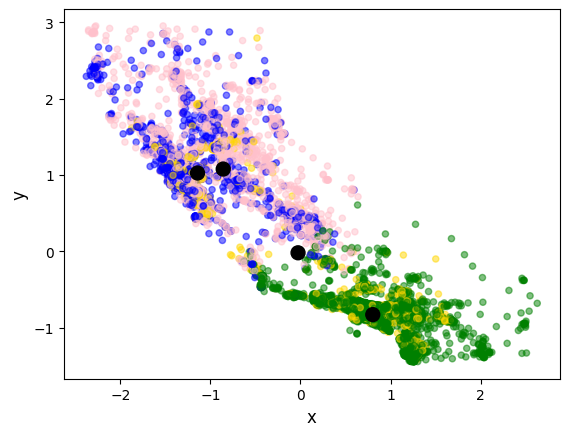

In [50]:
housing_tr['cluster_list'], housing_tr['distance'], centroids = k_means(4, housing_tr)
stats4 = pd.DataFrame()
stats4['clusters1_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].mean()
stats4['clusters2_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].mean()
stats4['clusters3_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].mean()
stats4['clusters4_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].mean()
stats4['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
stats4['clusters2_std'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].std()
stats4['clusters3_std'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].std()
stats4['clusters4_std'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].std()
sse = np.sum((housing_tr['distance'])**2)
print(stats4)
print(sse)

points_color = ListedColormap(['blue', 'green', 'pink', 'gold'])
centroids_color = ListedColormap(['black','black','black','black'])
plt.scatter(housing_tr.iloc[:,0], housing_tr.iloc[:, 1], marker = 'o',
            c = housing_tr['cluster_list'].astype('category'), cmap = points_color, s = 20, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = ('o'), s = 100, c = [0,1,2,3], cmap = centroids_color)
plt.xlabel(r'x', fontsize = 12)
plt.ylabel(r'y', fontsize = 12)
plt.show

<ipython-input-11-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-11-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)


                    clusters1_mean  clusters2_mean  clusters3_mean  \
longitude                -1.237069       -1.183947        0.257960   
latitude                  1.176762        1.053846       -0.243619   
housing_median_age       -0.233076        1.267334       -0.874753   
total_rooms               0.029133       -0.469937        1.793759   
total_bedrooms           -0.055114       -0.448190        1.886472   
population               -0.077226       -0.501763        1.728009   
households               -0.037502       -0.446989        1.876928   
median_income             0.307072       -0.357976        0.131087   
<1H OCEAN                 0.310408        0.085372        0.489461   
INLAND                    0.340975        0.301199        0.332084   
ISLAND                    0.000000        0.000000        0.000000   
NEAR BAY                  0.226710        0.504077        0.066511   
NEAR OCEAN                0.121907        0.109353        0.111944   
cluster_list        

<ipython-input-11-4dfa128a7e40>:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-14-160d1f3fb92c>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats5['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
<ipython-input-14-160d1f3fb92c>:9: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or s

<function matplotlib.pyplot.show(close=None, block=None)>

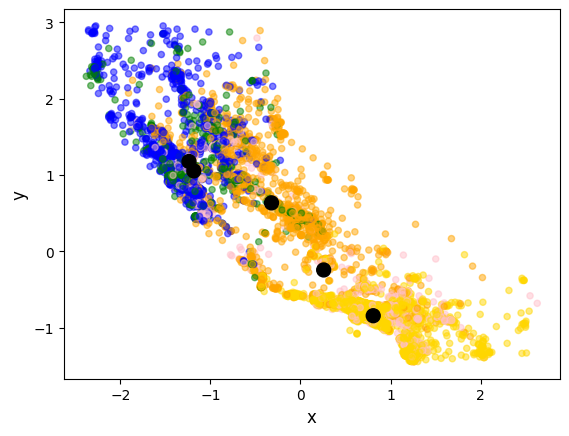

In [14]:
housing_tr['cluster_list'], housing_tr['distance'], centroids = k_means(5, housing_tr)
stats5 = pd.DataFrame()
stats5['clusters1_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].mean()
stats5['clusters2_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].mean()
stats5['clusters3_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].mean()
stats5['clusters4_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].mean()
stats5['clusters5_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].mean()
stats5['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
stats5['clusters2_std'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].std()
stats5['clusters3_std'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].std()
stats5['clusters4_std'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].std()
stats5['clusters5_std'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].std()
sse = np.sum((housing_tr['distance'])**2)
print(stats5)
print(sse)

points_color = ListedColormap(['blue', 'green', 'pink', 'gold', 'orange'])
centroids_color = ListedColormap(['black','black','black','black','black'])
plt.scatter(housing_tr.iloc[:,0], housing_tr.iloc[:, 1], marker = 'o',
            c = housing_tr['cluster_list'].astype('category'), cmap = points_color, s = 20, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = ('o'), s = 100, c = [0,1,2,3,4], cmap = centroids_color)
plt.xlabel(r'x', fontsize = 12)
plt.ylabel(r'y', fontsize = 12)
plt.show

<ipython-input-11-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-11-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)


                    clusters1_mean  clusters2_mean  clusters3_mean  \
longitude                -1.312285        0.803533       -1.344731   
latitude                  1.031961       -0.832421        1.058108   
housing_median_age        1.480266        0.106400       -0.050208   
total_rooms              -0.315442       -0.217457       -0.473251   
total_bedrooms           -0.274926       -0.190034       -0.538965   
population               -0.364328       -0.134300       -0.545666   
households               -0.265372       -0.185470       -0.533916   
median_income            -0.197765        0.007165        0.349933   
<1H OCEAN                 0.072581        0.663365        0.425185   
INLAND                    0.104839        0.179249        0.082963   
ISLAND                    0.000000        0.000483        0.000000   
NEAR BAY                  0.704973        0.000000        0.279259   
NEAR OCEAN                0.117608        0.156903        0.212593   
cluster_list        

<ipython-input-11-4dfa128a7e40>:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-15-4ee1484f2b5f>:9: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats6['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
<ipython-input-15-4ee1484f2b5f>:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or 

<function matplotlib.pyplot.show(close=None, block=None)>

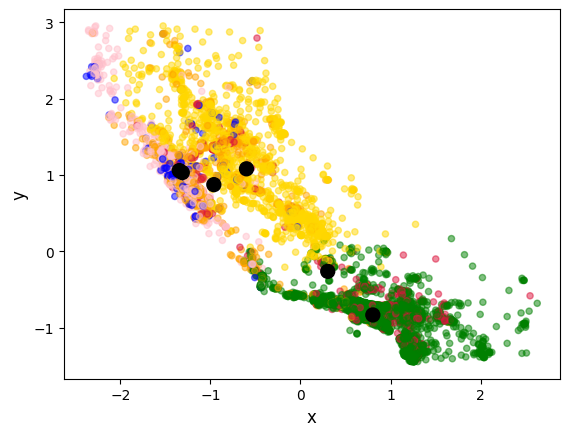

In [15]:
housing_tr['cluster_list'], housing_tr['distance'], centroids = k_means(6, housing_tr)
stats6 = pd.DataFrame()
stats6['clusters1_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].mean()
stats6['clusters2_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].mean()
stats6['clusters3_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].mean()
stats6['clusters4_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].mean()
stats6['clusters5_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].mean()
stats6['clusters6_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].mean()
stats6['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
stats6['clusters2_std'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].std()
stats6['clusters3_std'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].std()
stats6['clusters4_std'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].std()
stats6['clusters5_std'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].std()
stats6['clusters6_std'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].std()
sse = np.sum((housing_tr['distance'])**2)
print(stats6)
print(sse)

points_color = ListedColormap(['blue', 'green', 'pink', 'gold', 'orange', 'crimson'])
centroids_color = ListedColormap(['black','black','black','black','black','black'])
plt.scatter(housing_tr.iloc[:,0], housing_tr.iloc[:, 1], marker = 'o',
            c = housing_tr['cluster_list'].astype('category'), cmap = points_color, s = 20, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = ('o'), s = 100, c = [0,1,2,3,4,5], cmap = centroids_color)
plt.xlabel(r'x', fontsize = 12)
plt.ylabel(r'y', fontsize = 12)
plt.show

<ipython-input-11-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-11-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)


                    clusters1_mean  clusters2_mean  clusters3_mean  \
longitude                -0.850806        0.867491        0.559791   
latitude                  1.151622       -0.875574       -0.613956   
housing_median_age       -0.779517       -0.692926        0.553956   
total_rooms              -0.124795        0.195023       -0.001674   
total_bedrooms           -0.146520        0.146110        0.327445   
population               -0.197661        0.116402        0.519158   
households               -0.179196        0.144100        0.342529   
median_income            -0.353045        0.323688       -0.719677   
<1H OCEAN                 0.138870        0.613236        0.656856   
INLAND                    0.741800        0.203193        0.220736   
ISLAND                    0.000000        0.000000        0.000669   
NEAR BAY                  0.071528        0.000000        0.001338   
NEAR OCEAN                0.047802        0.183572        0.120401   
cluster_list        

<ipython-input-11-4dfa128a7e40>:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-13-355058fcc0df>:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats7['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
<ipython-input-13-355058fcc0df>:11: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or

<function matplotlib.pyplot.show(close=None, block=None)>

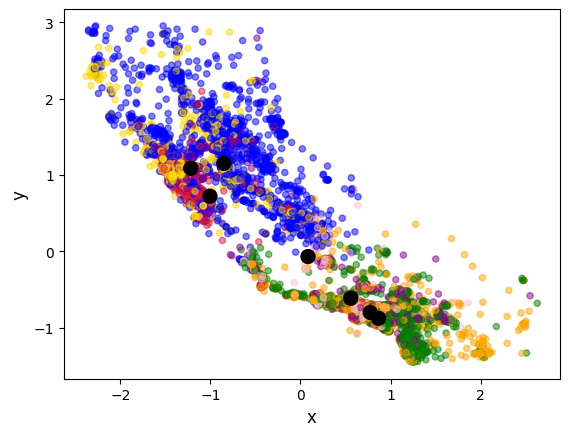

In [13]:
housing_tr['cluster_list'], housing_tr['distance'], centroids = k_means(7, housing_tr)
stats7 = pd.DataFrame()
stats7['clusters1_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].mean()
stats7['clusters2_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].mean()
stats7['clusters3_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].mean()
stats7['clusters4_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].mean()
stats7['clusters5_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].mean()
stats7['clusters6_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].mean()
stats7['clusters7_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 6, :].mean()
stats7['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
stats7['clusters2_std'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].std()
stats7['clusters3_std'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].std()
stats7['clusters4_std'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].std()
stats7['clusters5_std'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].std()
stats7['clusters6_std'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].std()
stats7['clusters7_std'] = housing_tr.loc[housing_tr['cluster_list'] == 6, :].std()
sse = np.sum((housing_tr['distance'])**2)
print(stats7)
print(sse)

points_color = ListedColormap(['blue', 'green', 'pink', 'gold', 'orange', 'crimson', 'darkmagenta'])
centroids_color = ListedColormap(['black','black','black','black','black','black','black'])
plt.scatter(housing_tr.iloc[:,0], housing_tr.iloc[:, 1], marker = 'o',
            c = housing_tr['cluster_list'].astype('category'), cmap = points_color, s = 20, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = ('o'), s = 100, c = [0,1,2,3,4,5,6], cmap = centroids_color)
plt.xlabel(r'x', fontsize = 12)
plt.ylabel(r'y', fontsize = 12)
plt.show

<ipython-input-40-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-40-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)


                    clusters1_mean  clusters2_mean  clusters3_mean  \
longitude                 0.975823       -0.821884        0.689668   
latitude                 -0.881490        1.125909       -0.785602   
housing_median_age       -1.002977       -0.589827        0.294564   
total_rooms               0.148195       -0.207565        0.072948   
total_bedrooms            0.211595       -0.203681        0.147662   
population                0.137879       -0.241171        0.257393   
households                0.168713       -0.234596        0.183866   
median_income            -0.091049       -0.457591        0.038684   
<1H OCEAN                 0.421192        0.127138        0.797113   
INLAND                    0.351435        0.760891        0.090309   
ISLAND                    0.000000        0.000000        0.000000   
NEAR BAY                  0.000000        0.062924        0.000000   
NEAR OCEAN                0.227373        0.049048        0.112577   
cluster_list        

<ipython-input-40-4dfa128a7e40>:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-54-08a09d246665>:11: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats8['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
<ipython-input-54-08a09d246665>:12: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or

<function matplotlib.pyplot.show(close=None, block=None)>

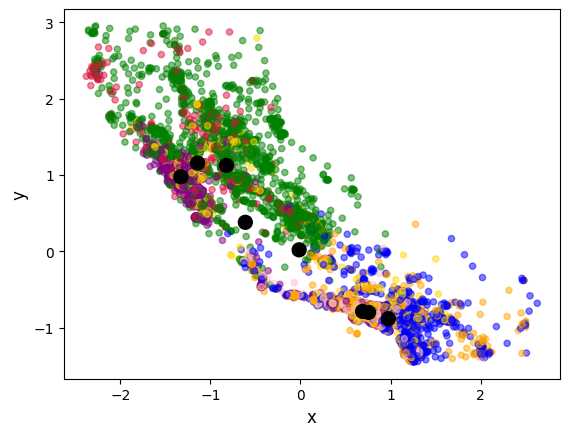

In [54]:
housing_tr['cluster_list'], housing_tr['distance'], centroids = k_means(8, housing_tr)
stats8 = pd.DataFrame()
stats8['clusters1_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].mean()
stats8['clusters2_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].mean()
stats8['clusters3_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].mean()
stats8['clusters4_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].mean()
stats8['clusters5_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].mean()
stats8['clusters6_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].mean()
stats8['clusters7_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 6, :].mean()
stats8['clusters8_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 7, :].mean()
stats8['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
stats8['clusters2_std'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].std()
stats8['clusters3_std'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].std()
stats8['clusters4_std'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].std()
stats8['clusters5_std'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].std()
stats8['clusters6_std'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].std()
stats8['clusters7_std'] = housing_tr.loc[housing_tr['cluster_list'] == 6, :].std()
stats8['clusters8_std'] = housing_tr.loc[housing_tr['cluster_list'] == 7, :].std()
sse = np.sum((housing_tr['distance'])**2)
print(stats8)
print(sse)

points_color = ListedColormap(['blue', 'green', 'pink', 'gold', 'orange', 'crimson', 'darkmagenta','purple'])
centroids_color = ListedColormap(['black','black','black','black','black','black','black','black'])
plt.scatter(housing_tr.iloc[:,0], housing_tr.iloc[:, 1], marker = 'o',
            c = housing_tr['cluster_list'].astype('category'), cmap = points_color, s = 20, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = ('o'), s = 100, c = [0,1,2,3,4,5,6,7], cmap = centroids_color)
plt.xlabel(r'x', fontsize = 12)
plt.ylabel(r'y', fontsize = 12)
plt.show

<ipython-input-40-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-40-4dfa128a7e40>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)


                    clusters1_mean  clusters2_mean  clusters3_mean  \
longitude                -0.480853        0.429482       -1.047523   
latitude                  0.229750       -0.095187        1.019932   
housing_median_age        0.129582       -0.520508       -0.540232   
total_rooms              -0.097437       -0.441013        0.535054   
total_bedrooms           -0.462317       -0.418439        0.532631   
population               -0.422219       -0.375306        0.444109   
households               -0.431416       -0.457004        0.553269   
median_income             2.591193       -0.722666       -0.015900   
<1H OCEAN                 0.548619        0.044575        0.262851   
INLAND                    0.084034        0.888141        0.431373   
ISLAND                    0.000000        0.000000        0.000000   
NEAR BAY                  0.219688        0.000000        0.206147   
NEAR OCEAN                0.147659        0.067283        0.099629   
cluster_list        

<ipython-input-40-4dfa128a7e40>:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroids = data.groupby('cluster_list').agg('mean').reset_index(drop = True)
<ipython-input-55-505d7256929a>:12: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats9['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
<ipython-input-55-505d7256929a>:13: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or

<function matplotlib.pyplot.show(close=None, block=None)>

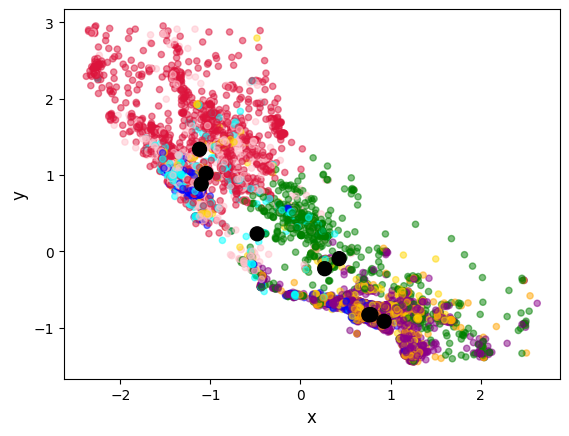

In [55]:
housing_tr['cluster_list'], housing_tr['distance'], centroids = k_means(9, housing_tr)
stats9 = pd.DataFrame()
stats9['clusters1_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].mean()
stats9['clusters2_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].mean()
stats9['clusters3_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].mean()
stats9['clusters4_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].mean()
stats9['clusters5_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].mean()
stats9['clusters6_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].mean()
stats9['clusters7_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 6, :].mean()
stats9['clusters8_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 7, :].mean()
stats9['clusters9_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 8, :].mean()
stats9['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
stats9['clusters2_std'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].std()
stats9['clusters3_std'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].std()
stats9['clusters4_std'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].std()
stats9['clusters5_std'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].std()
stats9['clusters6_std'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].std()
stats9['clusters7_std'] = housing_tr.loc[housing_tr['cluster_list'] == 6, :].std()
stats9['clusters8_std'] = housing_tr.loc[housing_tr['cluster_list'] == 7, :].std()
stats9['clusters9_std'] = housing_tr.loc[housing_tr['cluster_list'] == 8, :].std()
sse = np.sum((housing_tr['distance'])**2)
print(stats9)
print(sse)

points_color = ListedColormap(['blue', 'green', 'pink', 'gold', 'orange', 'crimson', 'darkmagenta','purple', 'cyan'])
centroids_color = ListedColormap(['black','black','black','black','black','black','black','black','black'])
plt.scatter(housing_tr.iloc[:,0], housing_tr.iloc[:, 1], marker = 'o',
            c = housing_tr['cluster_list'].astype('category'), cmap = points_color, s = 20, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = ('o'), s = 100, c = [0,1,2,3,4,5,6,7,8], cmap = centroids_color)
plt.xlabel(r'x', fontsize = 12)
plt.ylabel(r'y', fontsize = 12)
plt.show

                    clusters1_mean  clusters2_mean  clusters3_mean  \
longitude                -1.190026       -0.739866        0.681397   
latitude                  0.910647        1.145639       -0.786773   
housing_median_age       -0.377440       -0.578407        0.388608   
total_rooms              -0.051632       -0.444166       -0.342683   
total_bedrooms           -0.398920       -0.472695       -0.303680   
population               -0.318585       -0.494785       -0.191914   
households               -0.360487       -0.521583       -0.278320   
median_income             1.951420       -0.497303       -0.004982   
<1H OCEAN                 0.427326        0.069477        0.972806   
INLAND                    0.155523        0.867994        0.002060   
ISLAND                    0.000000        0.000000        0.000000   
NEAR BAY                  0.299419        0.037054        0.000000   
NEAR OCEAN                0.117733        0.025475        0.025134   
cluster_list        

<ipython-input-12-14bd6947e517>:13: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats10['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
<ipython-input-12-14bd6947e517>:14: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats10['clusters2_std'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].std()
<ipython-input-12-14bd6947e517>:15: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None

<function matplotlib.pyplot.show(close=None, block=None)>

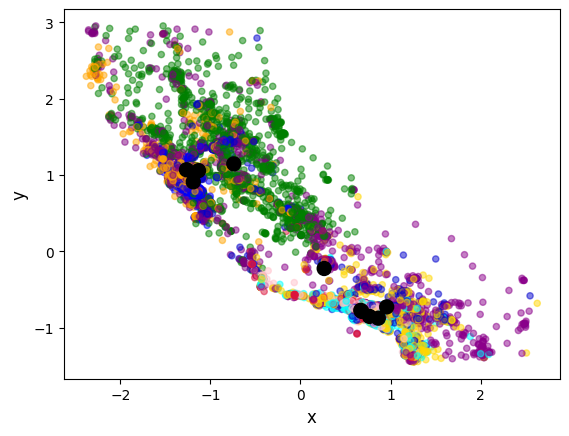

In [12]:
housing_tr['cluster_list'], housing_tr['distance'], centroids = k_means(10, housing_tr)
stats10 = pd.DataFrame()
stats10['clusters1_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].mean()
stats10['clusters2_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].mean()
stats10['clusters3_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].mean()
stats10['clusters4_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].mean()
stats10['clusters5_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].mean()
stats10['clusters6_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].mean()
stats10['clusters7_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 6, :].mean()
stats10['clusters8_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 7, :].mean()
stats10['clusters9_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 8, :].mean()
stats10['clusters10_mean'] = housing_tr.loc[housing_tr['cluster_list'] == 9, :].mean()
stats10['clusters1_std'] = housing_tr.loc[housing_tr['cluster_list'] == 0, :].std()
stats10['clusters2_std'] = housing_tr.loc[housing_tr['cluster_list'] == 1, :].std()
stats10['clusters3_std'] = housing_tr.loc[housing_tr['cluster_list'] == 2, :].std()
stats10['clusters4_std'] = housing_tr.loc[housing_tr['cluster_list'] == 3, :].std()
stats10['clusters5_std'] = housing_tr.loc[housing_tr['cluster_list'] == 4, :].std()
stats10['clusters6_std'] = housing_tr.loc[housing_tr['cluster_list'] == 5, :].std()
stats10['clusters7_std'] = housing_tr.loc[housing_tr['cluster_list'] == 6, :].std()
stats10['clusters8_std'] = housing_tr.loc[housing_tr['cluster_list'] == 7, :].std()
stats10['clusters9_std'] = housing_tr.loc[housing_tr['cluster_list'] == 8, :].std()
stats10['clusters10_std'] = housing_tr.loc[housing_tr['cluster_list'] == 9, :].std()
sse = np.sum((housing_tr['distance'])**2)
print(stats10)
print(sse)

points_color = ListedColormap(['blue', 'green', 'pink', 'gold', 'orange', 'crimson', 'darkmagenta','purple', 'cyan', 'mediumblue'])
centroids_color = ListedColormap(['black','black','black','black','black','black','black','black','black','black'])
plt.scatter(housing_tr.iloc[:,0], housing_tr.iloc[:, 1], marker = 'o',
            c = housing_tr['cluster_list'].astype('category'), cmap = points_color, s = 20, alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker = ('o'), s = 100, c = [0,1,2,3,4,5,6,7,8,9], cmap = centroids_color)
plt.xlabel(r'x', fontsize = 12)
plt.ylabel(r'y', fontsize = 12)
plt.show

As k increases, the gap between San Francisco and Los Anageles remains, and houses in these areas are further clustered into different groups. Degrees of economics development plays an important factor since some clusters centered on the two major cities and some clusters cover other rural areas. The Sillicon Valley is successfully identified to a independent cluster(lower centroid in the San Francisco area with blue distribution) compared to the upper orange distribution.

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge.



According to the experiments of different k values, k ranging from 5 to 7 gives a fair clustering outcome. These clusters are mainly consitituted by: expensive house clusters in two major cities, relatively affordable house clusters in two major cities, some rural area housing clusters. Housing prices in major city areas are high, which caused urban people and companies to immigrate out of the state.

Efforts should be made to increase the density of housing in urban areas given the limited space, so more multi-unit, tall apartments in cities could help. Also, more housing opportunities in rural areas would lead to a in-state migration, which could mitigate the problem. Given a lower birth and net decrease in population, I believe the problem would not be as severe in the following years.

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!